In [76]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4699368084541311889
]


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [78]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [79]:
import pandas as pd

df = pd.read_excel("Data for headed bars_for DataFrame_220725.xlsx", skiprows = 17, engine = 'openpyxl')
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "Ld", "fcm", "db", "b", "cos,avg",
                                 "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "Fsu at La, test", "dtr", "Ntr", "st"]) # st 제거시
df

,No.,Author,Year,Test type,Remark,Specimen,fy,Ld,fcm,db,...,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,"Fsu at La, test",dtr,Ntr,st
0,1.0,Wright,NaN,Stub-beam,NaN,1-TH01-P-NS-2DB-292,517.500000,12.700,28.460000,25.400,...,101.80,305.000000,0.000000,1.0,45.470000,9.395954,376.153911,0.000,0.0,12.700000
1,2.0,Wright,NaN,Stub-beam,NaN,1-TH02-P-NS-2DB-292,517.500000,12.700,28.460000,25.400,...,101.80,305.000000,0.000000,1.0,45.390000,9.395954,388.271356,0.000,0.0,12.700000
2,3.0,Wright,NaN,Stub-beam,NaN,1-TH03-P-NS-2DB-292,517.500000,12.700,28.460000,25.400,...,101.80,305.000000,0.000000,1.0,47.120000,9.395954,364.470642,0.000,0.0,12.700000
3,4.0,Wright,NaN,Stub-beam,NaN,2-TH04-NP-3S1-208-19,517.500000,285.750,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.960000,9.395954,482.092746,9.500,3.0,127.000000
4,5.0,Wright,NaN,Stub-beam,NaN,2-TH05-NP-3S1-208-19,517.500000,285.750,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,50.800000,9.395954,462.692993,9.500,3.0,127.000000
5,6.0,Wright,NaN,Stub-beam,NaN,2-TH06-NP-3S1-208-13,517.500000,292.100,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.730000,9.395954,453.476630,9.500,3.0,127.000000
6,7.0,Wright,NaN,Stub-beam,NaN,2-TH07-NP-NS-208-16,517.500000,289.052,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.680000,9.395954,293.542144,0.000,0.0,289.052000
7,8.0,Wright,NaN,Stub-beam,NaN,2-TH08-NP-NS-20B-16,517.500000,289.052,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,47.680000,9.395954,307.317351,0.000,0.0,289.052000
8,9.0,Wright,NaN,Stub-beam,NaN,2-TH09-NP-NS-20B-16,517.500000,289.052,33.630000,25.400,...,101.80,305.000000,0.000000,1.0,49.480000,9.395954,330.585213,0.000,0.0,289.052000
9,10.0,Wright,NaN,Stub-beam,NaN,3-TH04-NP-4S1 -308-19,517.500000,285.750,33.440000,25.400,...,101.80,305.000000,0.000000,1.0,82.190000,9.395954,480.257367,9.500,3.0,76.000000


In [80]:
df = df[df["Test type"] == "Joint type"]  # 실험방법이 Joint type일 경우: 성능이 크게 개선됨.

df

,No.,Author,Year,Test type,Remark,Specimen,fy,Ld,fcm,db,...,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,"Fsu at La, test",dtr,Ntr,st
134,135.0,Hong,2007.0,Joint type,NaN,#18-M-0.9L-(1),447.700000,888.000,24.200000,57.300,...,146.35,50.000000,0.000000,1.0,853.000000,5.000000,NaN,0.000,0.0,888.000
135,136.0,Hong,2007.0,Joint type,NaN,#18-M-0.7L-(1),447.700000,684.000,24.200000,57.300,...,146.35,254.000000,0.000000,1.0,853.000000,5.000000,NaN,0.000,0.0,684.000
136,137.0,Hong,2007.0,Joint type,NaN,#18-M-0.7L-2R-(1),447.700000,684.000,24.200000,57.300,...,146.35,254.000000,0.000000,1.0,853.000000,5.000000,NaN,0.000,0.0,684.000
137,138.0,Hong,2007.0,Joint type,NaN,#18-M-0.5L-(1),447.700000,479.000,24.200000,57.300,...,146.35,459.000000,0.000000,1.0,853.000000,5.000000,119.721038,0.000,0.0,479.000
138,139.0,Hong,2007.0,Joint type,NaN,#11-M-0.9L-(1),450.600000,372.000,24.600000,35.800,...,92.10,50.000000,0.000000,1.0,369.000000,5.000000,NaN,0.000,0.0,372.000
139,140.0,Hong,2007.0,Joint type,NaN,#11-M-0.7L-(1),450.600000,295.000,24.600000,35.800,...,92.10,127.000000,0.000000,1.0,369.000000,5.000000,NaN,0.000,0.0,295.000
140,141.0,Hong,2007.0,Joint type,NaN,#11-M-0.7L-2R-(1),450.600000,295.000,24.600000,35.800,...,92.10,127.000000,0.000000,1.0,369.000000,5.000000,NaN,0.000,0.0,295.000
141,142.0,Hong,2007.0,Joint type,NaN,#11-M-0.5L-(1),450.600000,217.000,24.600000,35.800,...,92.10,205.000000,0.000000,1.0,369.000000,5.000000,118.787276,0.000,0.0,217.000
142,143.0,Hong,2007.0,Joint type,NaN,#8-M-0.9L-(1),454.800000,264.000,25.100000,25.400,...,67.30,50.000000,0.000000,1.0,278.000000,5.000000,NaN,0.000,0.0,264.000
143,144.0,Hong,2007.0,Joint type,NaN,#8-M-0.7L-(1),454.800000,212.000,25.100000,25.400,...,67.30,102.000000,0.000000,1.0,278.000000,5.000000,NaN,0.000,0.0,212.000


In [6]:
# original_Fsu =  df["Fsu at La, test"]
# df["Fsu at La, test"] = np.log1p(df["Fsu at La, test"]) # 스케일링을 한다면 굳이 로그 함수를 사용하지 않아도 됩니다.

In [81]:
y= df["Fsu at La, test"]
y

134            NaN
135            NaN
136            NaN
137     119.721038
138            NaN
139            NaN
140            NaN
141     118.787276
142            NaN
143            NaN
144            NaN
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.

In [82]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 134 to 430
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              297 non-null    float64
 1   Author           297 non-null    object 
 2   Year             297 non-null    float64
 3   Test type        297 non-null    object 
 4   Remark           202 non-null    object 
 5   Specimen         297 non-null    object 
 6   fy               297 non-null    float64
 7   Ld               297 non-null    float64
 8   fcm              297 non-null    float64
 9   db               297 non-null    float64
 10  b                297 non-null    float64
 11  cos,avg          297 non-null    float64
 12  cth              297 non-null    float64
 13  ch               297 non-null    float64
 14  Nh               297 non-null    float64
 15  Bottom cover     293 non-null    float64
 16  Ah/Ab            297 non-null    float64
 17  Fsu at La, tes

In [83]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

Joint type    297
Name: Test type, dtype: int64


,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
134,447.700000,888.000,24.200000,57.300,350.00,146.35,50.000000,0.000000,1.0,853.000000,5.000000,888.000,1
135,447.700000,684.000,24.200000,57.300,350.00,146.35,254.000000,0.000000,1.0,853.000000,5.000000,684.000,1
136,447.700000,684.000,24.200000,57.300,350.00,146.35,254.000000,0.000000,1.0,853.000000,5.000000,684.000,1
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.000000,0.000000,1.0,853.000000,5.000000,479.000,1
138,450.600000,372.000,24.600000,35.800,220.00,92.10,50.000000,0.000000,1.0,369.000000,5.000000,372.000,1
139,450.600000,295.000,24.600000,35.800,220.00,92.10,127.000000,0.000000,1.0,369.000000,5.000000,295.000,1
140,450.600000,295.000,24.600000,35.800,220.00,92.10,127.000000,0.000000,1.0,369.000000,5.000000,295.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.000000,0.000000,1.0,369.000000,5.000000,217.000,1
142,454.800000,264.000,25.100000,25.400,160.00,67.30,50.000000,0.000000,1.0,278.000000,5.000000,264.000,1
143,454.800000,212.000,25.100000,25.400,160.00,67.30,102.000000,0.000000,1.0,278.000000,5.000000,212.000,1


In [84]:
y2 = y[~y.isnull()]
y2

137     119.721038
141     118.787276
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.000000
187     725.500000
188     721.000000
189     724.000000
190     722.500000
191     715.500000
192     723.000000
201     337.771484
202     269.223742
204     351.

In [11]:
X = X[~y.isnull()]
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.00,0.000,1.0,853.000000,5.0,479.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.00,0.000,1.0,369.000000,5.0,217.000,1
145,454.800000,161.000,25.100000,25.400,160.00,67.30,153.00,0.000,1.0,278.000000,5.0,161.000,1
146,606.000000,301.000,47.900000,43.000,541.80,43.00,56.00,369.800,2.0,138.166667,5.0,301.000,1
147,606.000000,301.000,47.900000,43.000,541.80,43.00,56.00,369.800,2.0,138.166667,5.0,370.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,931.034483,485.902,43.586207,35.814,563.88,71.12,86.36,350.012,2.0,508.000000,6.5,101.600,1
427,799.310345,495.300,37.448276,35.814,558.80,71.12,93.98,154.559,3.0,508.000000,5.5,495.300,1
428,931.034483,489.966,43.586207,35.814,556.26,71.12,87.63,153.289,3.0,508.000000,6.5,489.966,1
429,799.310345,492.252,37.448276,35.814,553.72,64.77,96.52,158.369,3.0,508.000000,5.5,101.600,1


In [85]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
pd.options.display.max_rows=None

X.dropna(inplace = True)
X


,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
134,447.700000,888.000,24.200000,57.300,350.00,146.35,50.000000,0.000000,1.0,853.000000,5.000000,888.000,1
135,447.700000,684.000,24.200000,57.300,350.00,146.35,254.000000,0.000000,1.0,853.000000,5.000000,684.000,1
136,447.700000,684.000,24.200000,57.300,350.00,146.35,254.000000,0.000000,1.0,853.000000,5.000000,684.000,1
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.000000,0.000000,1.0,853.000000,5.000000,479.000,1
138,450.600000,372.000,24.600000,35.800,220.00,92.10,50.000000,0.000000,1.0,369.000000,5.000000,372.000,1
139,450.600000,295.000,24.600000,35.800,220.00,92.10,127.000000,0.000000,1.0,369.000000,5.000000,295.000,1
140,450.600000,295.000,24.600000,35.800,220.00,92.10,127.000000,0.000000,1.0,369.000000,5.000000,295.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.000000,0.000000,1.0,369.000000,5.000000,217.000,1
142,454.800000,264.000,25.100000,25.400,160.00,67.30,50.000000,0.000000,1.0,278.000000,5.000000,264.000,1
143,454.800000,212.000,25.100000,25.400,160.00,67.30,102.000000,0.000000,1.0,278.000000,5.000000,212.000,1


In [13]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

137     119.721038
141     118.787276
145     112.745098
146     312.500000
147     417.000000
148     501.000000
149     437.000000
150     493.500000
151     592.500000
152     475.000000
153     540.000000
154     468.000000
155     644.000000
156     572.000000
157     607.000000
158     424.000000
159     628.000000
160     334.000000
161     424.000000
162     396.500000
163     367.000000
164     472.500000
165     445.000000
166     439.000000
167     586.000000
168     586.000000
169     588.000000
170     550.000000
171     510.000000
172     588.000000
173     847.500000
174     836.500000
175     685.000000
176     724.500000
177     670.000000
178     698.500000
179     725.000000
180     712.000000
181     721.000000
182     719.000000
183     730.000000
184     731.500000
185     707.000000
186     704.000000
187     725.500000
188     721.000000
189     724.000000
190     722.500000
191     715.500000
192     723.000000
201     337.771484
202     269.223742
204     351.

In [15]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [16]:
# Train, Valid, Test Set으로 분류

In [17]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [18]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.10, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((243, 13), (27, 13), (243,), (27,))

In [19]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((194, 13), (49, 13), (194,), (49,))

In [21]:
## X변수들을 MinMaxScaler로 스케일링을 진행하였습니다.
## --> Y도 스케일링 하여야 합니다.

In [22]:
print(type(X_train))
print(type(X_valid))
print(type(X_test))
print(type(y_train))
print(type(y_valid))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [23]:
from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

C:\Users\BBamJoong\Anaconda3\envs\BBamJoong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

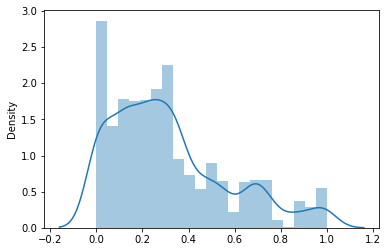

In [92]:
sns.distplot(X_train_scaled)

C:\Users\BBamJoong\Anaconda3\envs\BBamJoong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

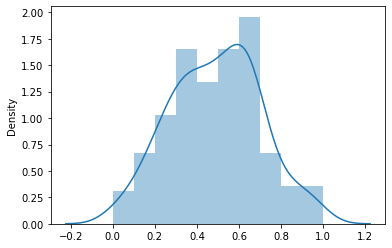

In [93]:
sns.distplot(y_train_scaled)

In [781]:
##층을 여기서 더 추가하거나 하여도 오히려 성능이 더 떨어지는 결과가 나옵니다.
# Set random seed
tf.random.set_seed(42)

# 1. Create a model  --> 일단 현재 네트워크 사용: 최종 네트워크는 실험을 통해 결정(성능 vs 비용 비교하여 효율적인 방향으로 설정)
model_1 = tf.keras.Sequential([
#            tf.keras.layers.Dense(500, activation='relu'),
#            tf.keras.layers.Dense(250, activation='relu'),
           tf.keras.layers.Dense(100, activation='relu'),
           tf.keras.layers.Dense(50, activation='relu'),
           tf.keras.layers.Dense(50, activation='linear'), 
           tf.keras.layers.Dense(1)
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['mse'])

In [782]:
# 3. Fit the model
history = model_1.fit(X_train_scaled, 
                      y_train_scaled, 
                      epochs=1000,    # Load가 크지 않은 문제이므로, 충분히 학습할 것(즉, Underfitting이 되지 않도록 할 것). 
                      verbose = 1,
                      # 단, Overfitting이 발생하면 더이상 학습할 필요가 없음. 
                      #validation_split = 0.1)
                      validation_data=(X_valid_scaled, y_valid_scaled))

Train on 194 samples, validate on 49 samples
Epoch 1/1000
194/194 [==============================] - 1s 3ms/sample - loss: 0.3265 - mse: 0.3265 - val_loss: 0.3341 - val_mse: 0.3341
Epoch 2/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.2802 - mse: 0.2802 - val_loss: 0.2846 - val_mse: 0.2846
Epoch 3/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.2387 - mse: 0.2387 - val_loss: 0.2409 - val_mse: 0.2409
Epoch 4/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.2020 - mse: 0.2020 - val_loss: 0.2024 - val_mse: 0.2024
Epoch 5/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.1705 - mse: 0.1705 - val_loss: 0.1697 - val_mse: 0.1697
Epoch 6/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.1441 - mse: 0.1441 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 7/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.1202 - mse: 0.1202 - val_loss: 0.1150 - val_mse

Epoch 60/1000
194/194 [==============================] - 0s 134us/sample - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 61/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 62/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 63/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 64/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 65/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 66/1000
194/194 [==============================] - 0s 144us/sample - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 67/1000
194/194 [====

Epoch 119/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 120/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 121/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 122/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 123/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 124/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 125/1000
194/194 [==============================] - 0s 122us/sample - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 126/1000
194/1

194/194 [==============================] - 0s 124us/sample - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 178/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 179/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 180/1000
194/194 [==============================] - 0s 126us/sample - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 181/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 182/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 183/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 184/1000
194/194 [===========

194/194 [==============================] - 0s 113us/sample - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 236/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 237/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 238/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 239/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 240/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 241/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 242/1000
194/194 [===========

194/194 [==============================] - 0s 108us/sample - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 294/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 295/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 296/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 297/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 298/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 299/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 300/1000
194/194 [===========

194/194 [==============================] - 0s 122us/sample - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 352/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 353/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 354/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 355/1000
194/194 [==============================] - 0s 115us/sample - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 356/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 357/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 358/1000
194/194 [===========

194/194 [==============================] - 0s 113us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 410/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 411/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 412/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 413/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 414/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 415/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 416/1000
194/194 [===========

194/194 [==============================] - 0s 134us/sample - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 468/1000
194/194 [==============================] - 0s 144us/sample - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 469/1000
194/194 [==============================] - 0s 134us/sample - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 470/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 471/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 472/1000
194/194 [==============================] - 0s 134us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 473/1000
194/194 [==============================] - 0s 134us/sample - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 474/1000
194/194 [===========

194/194 [==============================] - 0s 118us/sample - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 526/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 527/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 528/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 529/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 530/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 531/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 532/1000
194/194 [===========

194/194 [==============================] - 0s 113us/sample - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 584/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 585/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 586/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 587/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 588/1000
194/194 [==============================] - 0s 129us/sample - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 589/1000
194/194 [==============================] - 0s 139us/sample - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 590/1000
194/194 [===========

194/194 [==============================] - 0s 123us/sample - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 642/1000
194/194 [==============================] - 0s 139us/sample - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 643/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 644/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 645/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 646/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 647/1000
194/194 [==============================] - 0s 139us/sample - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 648/1000
194/194 [===========

Epoch 700/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 701/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 702/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 703/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 704/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 705/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 706/1000
194/194 [==============================] - 0s 98us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 707/1000
194/19

194/194 [==============================] - 0s 129us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 759/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 760/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 761/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 762/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 763/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 764/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 765/1000
194/194 [===========

Epoch 817/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 818/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 819/1000
194/194 [==============================] - 0s 98us/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 820/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 821/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 822/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 823/1000
194/194 [==============================] - 0s 118us/sample - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 824/1000
194/19

194/194 [==============================] - 0s 108us/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 876/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 877/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 878/1000
194/194 [==============================] - 0s 98us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 879/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 880/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 881/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 882/1000
194/194 [============

194/194 [==============================] - 0s 113us/sample - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 934/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 935/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 936/1000
194/194 [==============================] - 0s 98us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 937/1000
194/194 [==============================] - 0s 113us/sample - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 938/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 939/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 940/1000
194/194 [============

Epoch 992/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 993/1000
194/194 [==============================] - 0s 108us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 994/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 995/1000
194/194 [==============================] - 0s 103us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 996/1000
194/194 [==============================] - 0s 134us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 997/1000
194/194 [==============================] - 0s 129us/sample - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 998/1000
194/194 [==============================] - 0s 123us/sample - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 999/1000
194/1

Text(0.5, 0, 'epochs')

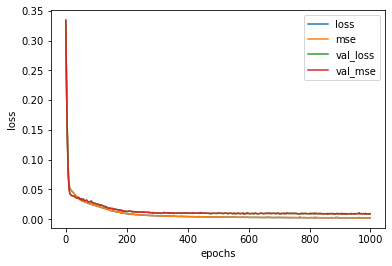

In [783]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [784]:
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "epochs.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'modelsave/Model7281834epochs.jpg'

<Figure size 432x288 with 0 Axes>

### Prediciton

In [785]:
y_p = model_1.predict(X_test_scaled)

In [786]:
y_p[:10], y_test_scaled[:10]

(array([[0.75433624],
        [0.6798295 ],
        [0.6623468 ],
        [0.45227772],
        [0.3810844 ],
        [0.41192538],
        [0.69748557],
        [0.6345391 ],
        [0.8694305 ],
        [0.33854967]], dtype=float32),
 array([[0.76728813],
        [0.65214751],
        [0.76377719],
        [0.43681026],
        [0.33958441],
        [0.45913619],
        [0.78610313],
        [0.635187  ],
        [0.98703655],
        [0.28989119]]))

In [787]:
y_test_unscaled = scY.inverse_transform(y_test_scaled)  # scaler.inverse_transform(): scaling을 환원(unscaling)
print(y_test_unscaled)
y_p_unscaled = scY.inverse_transform(y_p)
print(y_p_unscaled)

[[ 847.5       ]
 [ 737.24137931]
 [ 844.13793103]
 [ 531.03448276]
 [ 437.93103448]
 [ 552.4137931 ]
 [ 865.51724138]
 [ 721.        ]
 [1057.93103448]
 [ 390.34482759]
 [ 280.        ]
 [ 626.20689655]
 [ 437.93103448]
 [ 647.5862069 ]
 [ 560.        ]
 [ 544.82758621]
 [ 350.34482759]
 [ 600.        ]
 [ 573.79310345]
 [ 354.66005857]
 [ 513.79310345]
 [ 568.96551724]
 [ 724.        ]
 [ 707.        ]
 [ 327.5862069 ]
 [ 475.        ]
 [ 445.        ]]
[[835.0973 ]
 [763.74963]
 [747.0082 ]
 [545.8461 ]
 [477.67142]
 [507.2047 ]
 [780.6571 ]
 [720.3796 ]
 [945.31146]
 [436.94016]
 [173.99155]
 [645.27045]
 [423.40033]
 [652.99854]
 [706.30664]
 [480.72336]
 [404.01843]
 [542.614  ]
 [577.0558 ]
 [321.07794]
 [591.5142 ]
 [560.2927 ]
 [724.23987]
 [702.30457]
 [281.90836]
 [469.36624]
 [459.95755]]


In [788]:
# from keras.models import load_model
# model_1 = load_model('modelsave/Model7251545file.h5')

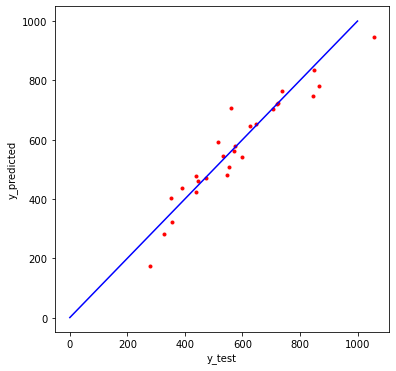

In [789]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(y_test_unscaled, y_p_unscaled, 'r.')
ax.set_xlabel("y_test")
ax.set_ylabel("y_predicted")
x = np.linspace(0, 1000, 100)
y = x
ax.plot(x, y, 'b')
#ax.set_xlim([y_p_unscaled.min(), y_p_unscaled.max()])
#ax.set_ylim([y_test_unscaled.min(), y_test_unscaled.max()])

In [790]:
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "comparison.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'modelsave/Model7281834comparison.jpg'

<Figure size 432x288 with 0 Axes>

In [ ]:
X_test_unscaled = scX.inverse_transform(X_test_scaled)  # scaler.inverse_transform(): scaling을 환원(unscaling)
print(X_test_unscaled)

In [791]:
score = model_1.evaluate(X_test_scaled, y_test_scaled)
print("test loss, test MAE:", score)

27/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 148us/sample - loss: 0.0036 - mse: 0.0036
test loss, test MAE: [0.00360831618309021, 0.0036083162]


In [792]:
from sklearn.metrics import r2_score
r2_score(y_test_unscaled, y_p_unscaled)

0.9020259214211727

In [795]:
division = y_p_unscaled/y_test_unscaled
cov = np.std(division) / np.mean(division)
print(cov)

0.11926618249532321


In [625]:
# 모델의 저장
from datetime import datetime
now = datetime.now()
model_1.save("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "file.h5")
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "file.jpg")

OSError: Unable to create file (unable to open file: name = 'modelsave/Model7281821file.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)